<a href="https://colab.research.google.com/github/StevenTaruc/LeagueOfLegendsAnalysis/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration
* Data 301 Final Project
* Steven Taruc, Josiah Lashley




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [0]:
plt.rcParams["figure.figsize"]=5,5

In [3]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
df_games = pd.read_csv('/drive/My Drive/games.csv')

## What role do you play the most?

(SOLO           57
 DUO_SUPPORT    20
 DUO            18
 DUO_CARRY       3
 NONE            2
 Name: role, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8fc8669b0>)

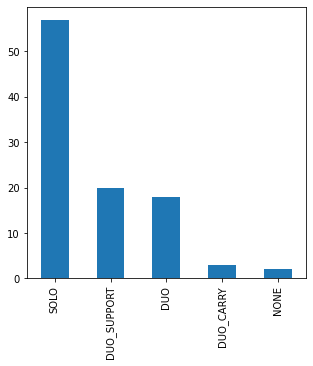

In [0]:
role_counts = df_games['role'].value_counts()
most_used_role = role_counts[[0]].index[0]
role_counts, role_counts.plot.bar()

## What lane do you play the most?

(TOP       64
 NONE      24
 MID       10
 JUNGLE     2
 Name: lane, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8fc7ba320>)

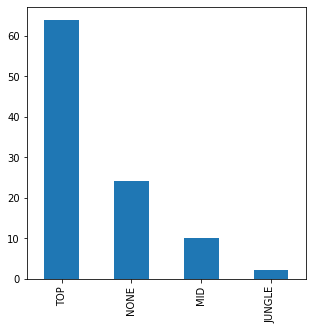

In [0]:
lane_counts = df_games['lane'].value_counts()
most_used_lane = lane_counts[[0]].index[0]
lane_counts, lane_counts.plot.bar()

## What champion do you play the most? 

(Kalista    16
 Camille    10
 Irelia      8
 Aatrox      7
 Graves      6
 Name: champion_name, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8fc6f7b00>)

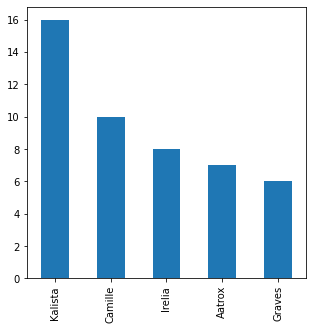

In [0]:
champ_counts = df_games['champion_name'].value_counts()
most_used_champ = champ_counts[[0]].index[0]
champ_counts[:5], champ_counts[:5].plot.bar()

In [0]:
df_games_stats = pd.read_csv('/drive/My Drive/game_stats.csv')

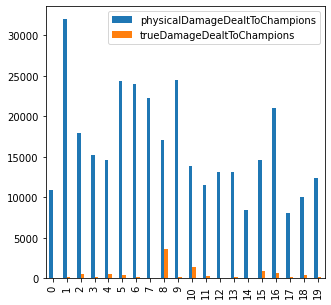

In [9]:
df_games_stats[['physicalDamageDealtToChampions','trueDamageDealtToChampions']][:20].plot.bar()

Difference of true damage dealt and physical damage dealt to opponents

In [15]:
df_games_stats.groupby('team_color')['kills'].mean()

team_color
blue    6.320755
red     5.574468
Name: kills, dtype: float64

The player tends to have higher kills on average when their assigned team color is blue.

# Getting in the Data of Me and Gbay

**My data will be on ranked games**


**Gbay is a famous league of legends youtuber and it will also be on ranked games**

In [0]:
df_me_ranked = pd.read_csv('/drive/My Drive/me_ranked.csv')
df_gbay_ranked = pd.read_csv('/drive/My Drive/gbay_ranked.csv')

In [0]:
img = plt.imread("LeagueMap.png")
plt.rcParams["figure.figsize"]=11,11

In [0]:
df_plot = df_gbay_ranked[df_gbay_ranked["type"] == "CHAMPION_KILL"]
df_plot["map.y"] = (15000 - df_plot["position.y"]) / 29.3
df_plot["map.x"] = df_plot["position.x"] / 29.3

In [0]:
# Looking at kills before and after 17 mins
df_kills = df_plot[df_plot["kill"] == 1]
df_k00 = df_kills[df_kills["minute"] < 17]
df_k17 = df_kills[(df_kills["minute"] >= 17)]

# Kills by time

**I have plotted Gbay's kills on the league of Legends map**

**The red dots are kills from 0 - 17 min in the game**

**The blue dots are kills after 17 mins in the game**

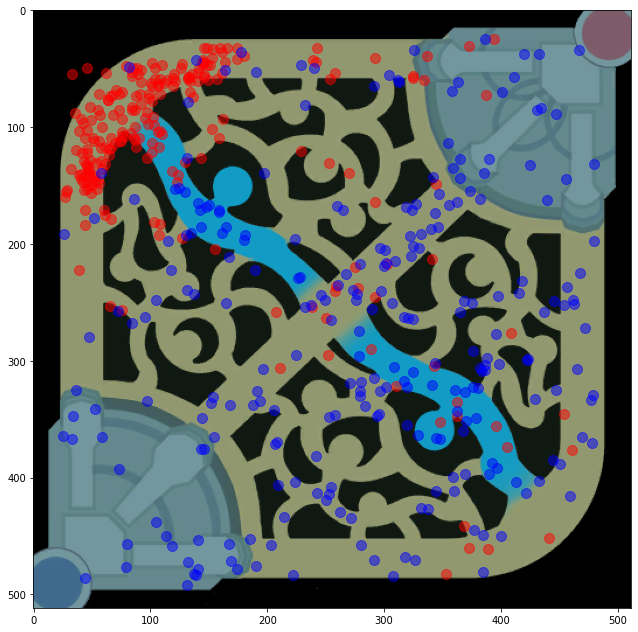

In [0]:
imgplot = plt.imshow(img)
plt.scatter(x=df_k00["map.x"], y=df_k00["map.y"], c="r", s=100, alpha=.5)
plt.scatter(x=df_k17["map.x"], y=df_k17["map.y"], c="b", s=100, alpha=.5)

In [0]:
df_plot = df_me_ranked[df_me_ranked["type"] == "CHAMPION_KILL"]
df_plot["map.y"] = (15000 - df_plot["position.y"]) / 29.3
df_plot["map.x"] = df_plot["position.x"] / 29.3
df_kills = df_plot[df_plot["kill"] == 1]
df_k00 = df_kills[df_kills["minute"] < 17]
df_k17 = df_kills[(df_kills["minute"] >= 17)]

# My Kills

**Mine is a lot more spread out**

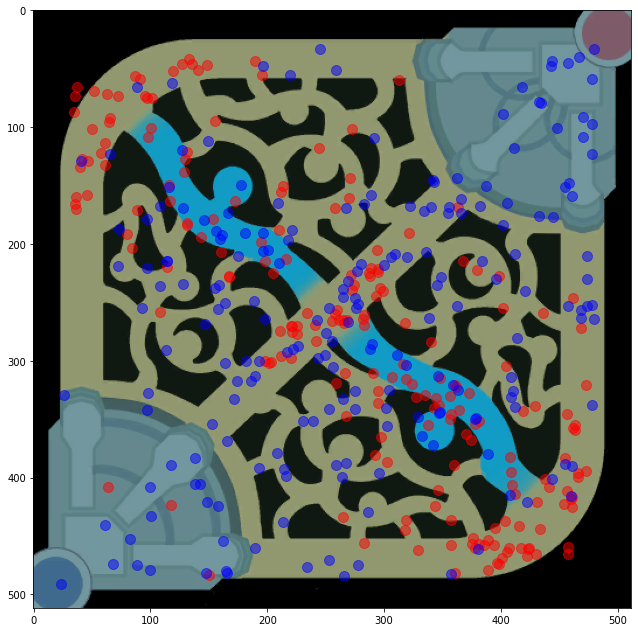

In [0]:
imgplot = plt.imshow(img)
plt.scatter(x=df_k00["map.x"], y=df_k00["map.y"], c="r", s=100, alpha=.5)
plt.scatter(x=df_k17["map.x"], y=df_k17["map.y"], c="b", s=100, alpha=.5)